### 데이터 가져오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

mini_data = pd.read_table('data/mini.csv',sep=',')

mini_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [2]:
mini_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

### 월간 활동적인 학습 일수

In [21]:
#오름차순 정렬
tb = mini_data[['user_id', 'monthly_active_learning_days', 'target']].sort_values('monthly_active_learning_days')
tb

,user_id,monthly_active_learning_days,target
4933,1dd0d3d5,1,0
8603,161a6815,1,1
3437,19330519,1,1
8606,3845fabe,1,1
3434,a8a14813,1,1
...,...,...,...
1053,6338e1e7,24,0
392,944dc201,24,1
1608,3286d12b,24,1
100,4e405dfa,24,1


In [25]:
#구간 나누기
labels=['적음', '보통', '많음']
tb['학습시간'] = pd.qcut(tb['monthly_active_learning_days'], 3, labels=labels)

In [26]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4933 to 1905
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       10000 non-null  object  
 1   monthly_active_learning_days  10000 non-null  int64   
 2   target                        10000 non-null  int64   
 3   학습시간                          10000 non-null  category
dtypes: category(1), int64(2), object(1)
memory usage: 322.4+ KB


In [27]:
tb.groupby(tb.target)['학습시간'].value_counts()

target  학습시간
0       보통      1415
        적음      1276
        많음      1110
1       보통      2280
        적음      2077
        많음      1842
Name: count, dtype: int64

In [28]:
drops = tb[tb['target'] == 0]
drops

,user_id,monthly_active_learning_days,target,학습시간
4933,1dd0d3d5,1,0,적음
4842,36b7e0be,1,0,적음
1647,05e5db91,1,0,적음
344,e9ceb185,1,0,적음
8638,992472fd,1,0,적음
...,...,...,...,...
8459,acc33866,24,0,많음
5668,21fab0de,24,0,많음
1761,c8aa2553,24,0,많음
1053,6338e1e7,24,0,많음


<Axes: title={'center': '구독 취소한 수강생의 \n월간 활동적인 학습 일수'}>

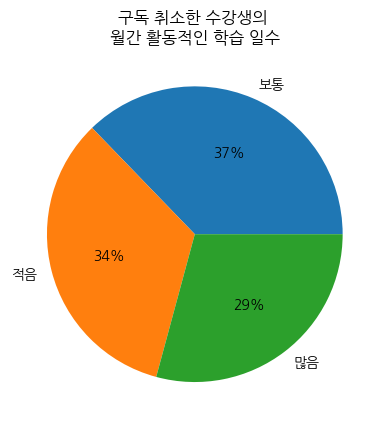

In [29]:
drops['학습시간'].value_counts().plot(kind = 'pie', ylabel='',title = '구독 취소한 수강생의 \n월간 활동적인 학습 일수', autopct = '%2.f%%')

In [30]:
subsc = tb[tb['target'] == 1]
subsc

,user_id,monthly_active_learning_days,target,학습시간
8603,161a6815,1,1,적음
3437,19330519,1,1,적음
8606,3845fabe,1,1,적음
3434,a8a14813,1,1,적음
3429,7d834557,1,1,적음
...,...,...,...,...
5677,2f19ed5f,24,1,많음
2088,aad1fe67,24,1,많음
392,944dc201,24,1,많음
1608,3286d12b,24,1,많음


<Axes: title={'center': '구독 유지한 수강생의 \n월간 활동적인 학습 일수'}>

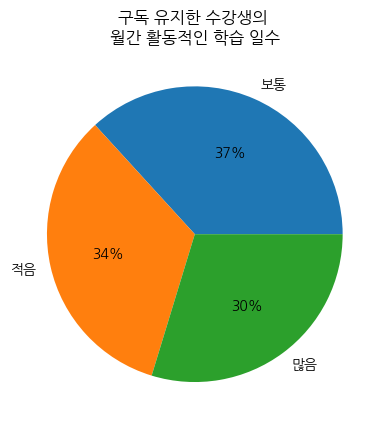

In [31]:
subsc['학습시간'].value_counts().plot(kind = 'pie', ylabel='', title = '구독 유지한 수강생의 \n월간 활동적인 학습 일수', autopct = '%2.f%%')

### 최근 학습 성취도

In [3]:
tb = mini_data[['user_id', 'recent_learning_achievement', 'target']].sort_values('recent_learning_achievement')
tb

,user_id,recent_learning_achievement,target
3964,fdc1e74f,35.941755,0
1249,4b92f841,36.115562,1
8299,9c31e1cc,36.830979,1
3567,ab49acd6,41.752942,0
4781,ea82462e,42.254863,0
...,...,...,...
5390,b0c92ddf,107.135153,0
7148,b723b8eb,108.127099,1
8394,9299c2fe,109.686851,1
2561,4747f01f,111.219647,1


In [4]:
labels=['낮음', '보통', '높음']
tb['성취도'] = pd.qcut(tb['recent_learning_achievement'], 3, labels=labels)
tb

,user_id,recent_learning_achievement,target,성취도
3964,fdc1e74f,35.941755,0,낮음
1249,4b92f841,36.115562,1,낮음
8299,9c31e1cc,36.830979,1,낮음
3567,ab49acd6,41.752942,0,낮음
4781,ea82462e,42.254863,0,낮음
...,...,...,...,...
5390,b0c92ddf,107.135153,0,높음
7148,b723b8eb,108.127099,1,높음
8394,9299c2fe,109.686851,1,높음
2561,4747f01f,111.219647,1,높음


In [5]:
tb.groupby(tb.target)['성취도'].value_counts()

target  성취도
0       낮음     1279
        보통     1270
        높음     1252
1       높음     2081
        보통     2063
        낮음     2055
Name: count, dtype: int64

<Axes: title={'center': '구독 취소한 수강생의 \n최근 학습 성취도'}>

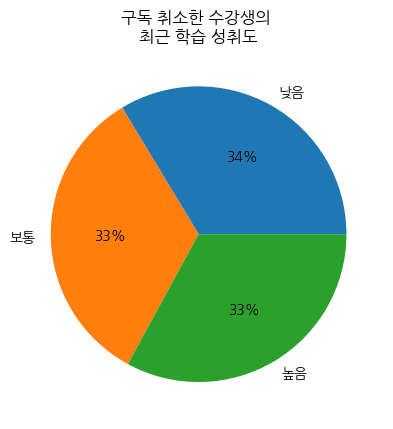

In [6]:
tb[tb['target'] == 0]['성취도'].value_counts().plot(kind = 'pie', ylabel='',title = '구독 취소한 수강생의 \n최근 학습 성취도', autopct = '%2.f%%')

<Axes: title={'center': '구독 유지한 수강생의 \n 최근 학습 성취도'}>

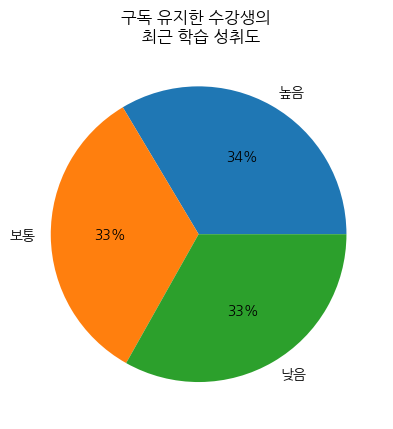

In [7]:
tb[tb['target'] == 1]['성취도'].value_counts().plot(kind = 'pie', ylabel='',title = '구독 유지한 수강생의 \n 최근 학습 성취도', autopct = '%2.f%%')

### 월간 활동적인 학습 일수와 최근 학습 성취도

In [8]:
tb = mini_data[['user_id', 'monthly_active_learning_days','recent_learning_achievement', 'target']].sort_values('recent_learning_achievement')
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3964 to 5843
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       10000 non-null  object 
 1   monthly_active_learning_days  10000 non-null  int64  
 2   recent_learning_achievement   10000 non-null  float64
 3   target                        10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 390.6+ KB


In [9]:
labels=['적음', '보통', '많음']
tb['학습시간'] = pd.qcut(tb['monthly_active_learning_days'], 3, labels=labels)
tb

,user_id,monthly_active_learning_days,recent_learning_achievement,target,학습시간
3964,fdc1e74f,6,35.941755,0,적음
1249,4b92f841,2,36.115562,1,적음
8299,9c31e1cc,5,36.830979,1,적음
3567,ab49acd6,5,41.752942,0,적음
4781,ea82462e,19,42.254863,0,많음
...,...,...,...,...,...
5390,b0c92ddf,22,107.135153,0,많음
7148,b723b8eb,15,108.127099,1,보통
8394,9299c2fe,10,109.686851,1,보통
2561,4747f01f,9,111.219647,1,보통


In [10]:
labels=['낮음', '보통', '높음']
tb['성취도'] = pd.qcut(tb['recent_learning_achievement'], 3, labels=labels)
tb

,user_id,monthly_active_learning_days,recent_learning_achievement,target,학습시간,성취도
3964,fdc1e74f,6,35.941755,0,적음,낮음
1249,4b92f841,2,36.115562,1,적음,낮음
8299,9c31e1cc,5,36.830979,1,적음,낮음
3567,ab49acd6,5,41.752942,0,적음,낮음
4781,ea82462e,19,42.254863,0,많음,낮음
...,...,...,...,...,...,...
5390,b0c92ddf,22,107.135153,0,많음,높음
7148,b723b8eb,15,108.127099,1,보통,높음
8394,9299c2fe,10,109.686851,1,보통,높음
2561,4747f01f,9,111.219647,1,보통,높음


In [11]:
tb.groupby(tb.target)[['성취도', '학습시간']].value_counts().sort_index()

target  성취도  학습시간
0       낮음   적음      463
             보통      458
             많음      358
        보통   적음      412
             보통      490
             많음      368
        높음   적음      401
             보통      467
             많음      384
1       낮음   적음      733
             보통      723
             많음      599
        보통   적음      702
             보통      738
             많음      623
        높음   적음      642
             보통      819
             많음      620
Name: count, dtype: int64

In [12]:
drops = tb[tb['target']==0]

tb1 = pd.pivot_table(drops, index = '학습시간', columns = '성취도', values = 'user_id', aggfunc = 'count')
tb1

성취도,낮음,보통,높음
학습시간,,,
적음,463,412,401
보통,458,490,467
많음,358,368,384


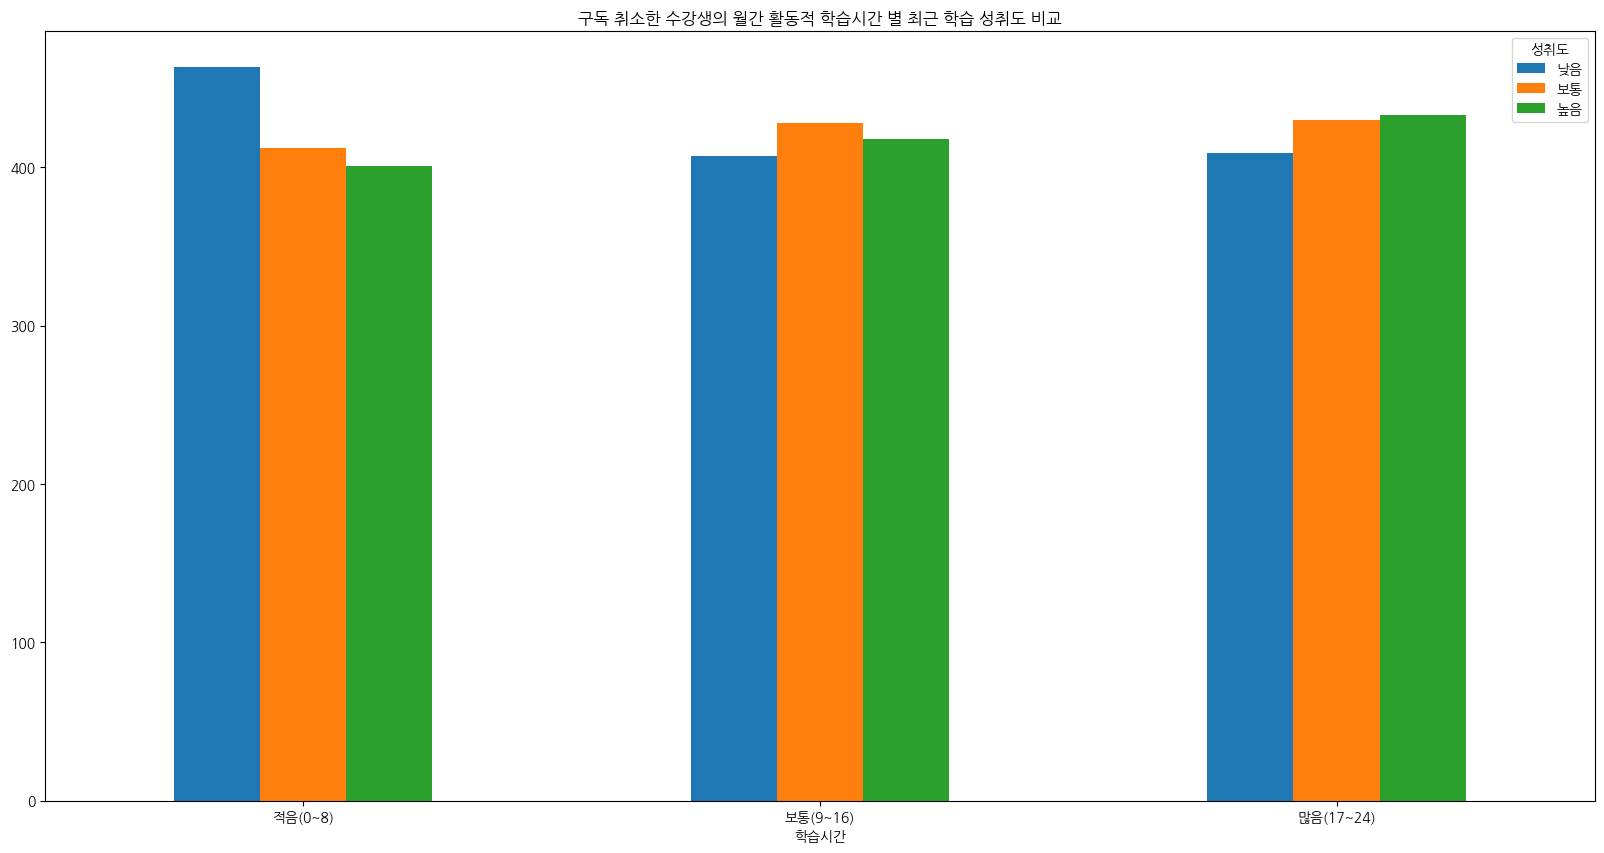

In [78]:
tb1.plot.bar(rot=0, figsize = (20,10), title = '구독 취소한 수강생의 월간 활동적 학습시간 별 최근 학습 성취도 비교')
plt.show()

In [13]:
subsc = tb[tb['target']==1]

tb2 = pd.pivot_table(subsc, index = '학습시간', columns = '성취도' , values = 'user_id', aggfunc = 'count')
tb2

성취도,낮음,보통,높음
학습시간,,,
적음,733,702,642
보통,723,738,819
많음,599,623,620


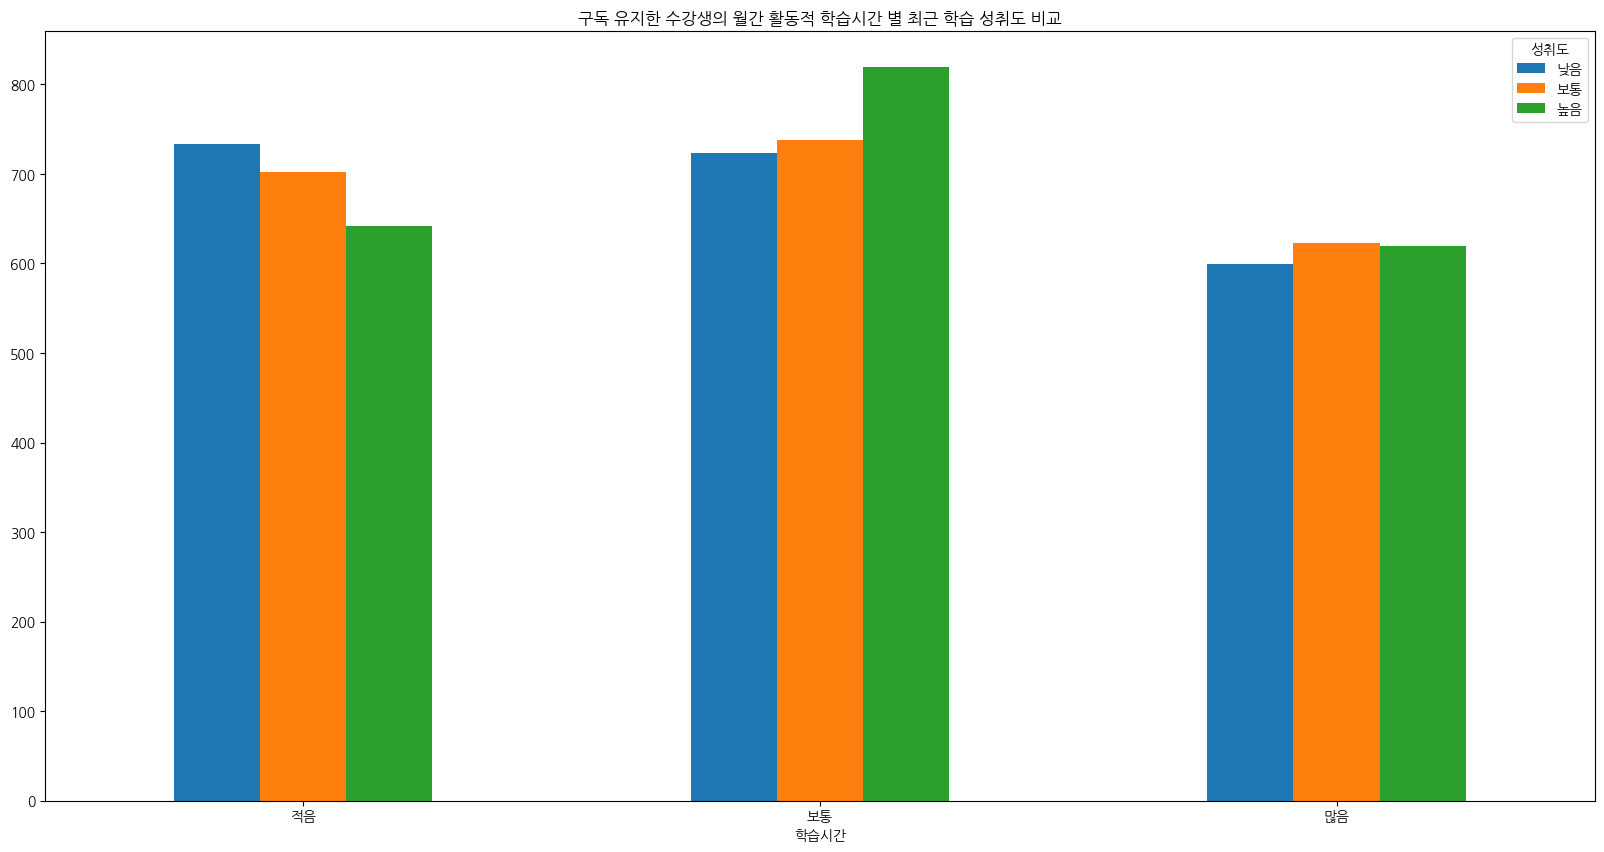

In [15]:
tb2.plot.bar(rot=0, figsize = (20,10),title = '구독 유지한 수강생의 월간 활동적 학습시간 별 최근 학습 성취도 비교')
plt.show()